In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats 
import matplotlib.pyplot as plt
from empiricaldist import Pmf , Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_aofm = pd.read_csv("PPO18_age_of_firstime_mothers.csv")# aofm = age_of_firstime_mothers

## EDA(Exploratory Data Analysis)

In [3]:
df_aofm.head()

,Statistic Label,State,Year,UNIT,VALUE
0,Mean Age of First Time- Mothers,State,1990,Years,26.3
1,Mean Age of First Time- Mothers,State,1991,Years,26.3
2,Mean Age of First Time- Mothers,State,1992,Years,26.4
3,Mean Age of First Time- Mothers,State,1993,Years,26.6
4,Mean Age of First Time- Mothers,State,1994,Years,26.8


In [4]:
print("CHECKING the shape: ",df_aofm.shape)#Checking shape
print("\n CHECKING NULL values :\n",df_aofm.dtypes)#checking data types
print("\n Check info:\n",df_aofm.info)# checking info
print("\n COUNT is :\n",df_aofm.count() )#count rows
print("\n CHECKING NULL values :\n",df_aofm.isnull().sum())#checking null values

CHECKING the shape:  (29, 5)

 CHECKING NULL values :
 Statistic Label     object
State               object
Year                 int64
UNIT                object
VALUE              float64
dtype: object

 Check info:
 <bound method DataFrame.info of                     Statistic Label  State  Year   UNIT  VALUE
0   Mean Age of First Time- Mothers  State  1990  Years   26.3
1   Mean Age of First Time- Mothers  State  1991  Years   26.3
2   Mean Age of First Time- Mothers  State  1992  Years   26.4
3   Mean Age of First Time- Mothers  State  1993  Years   26.6
4   Mean Age of First Time- Mothers  State  1994  Years   26.8
5   Mean Age of First Time- Mothers  State  1995  Years   27.0
6   Mean Age of First Time- Mothers  State  1996  Years   27.0
7   Mean Age of First Time- Mothers  State  1997  Years   27.1
8   Mean Age of First Time- Mothers  State  1998  Years   27.1
9   Mean Age of First Time- Mothers  State  1999  Years   27.2
10  Mean Age of First Time- Mothers  State  2000  Years 

In [5]:
df_aofm.columns# get column names

Index(['Statistic Label', 'State', 'Year', 'UNIT', 'VALUE'], dtype='object')

In [4]:
cols_to_drop = ['State','UNIT']# dropping columns that I won't use.
df_aofm.drop(columns=cols_to_drop, inplace=True)

In [5]:
df_aofm.rename(columns = {'Year':'year','VALUE':'average_age'},inplace = True) #Changing column names

In [8]:
#df_aofm['Statistic Label'] = df_aofm['Statistic Label'].astype("category")
#df_aofm['Statistic Label'] = df_aofm['Statistic Label'].cat.codes

In [9]:
df_aofm.head(10)# dataset before visualizing data


,Statistic Label,year,average_age
0,Mean Age of First Time- Mothers,1990,26.3
1,Mean Age of First Time- Mothers,1991,26.3
2,Mean Age of First Time- Mothers,1992,26.4
3,Mean Age of First Time- Mothers,1993,26.6
4,Mean Age of First Time- Mothers,1994,26.8
5,Mean Age of First Time- Mothers,1995,27.0
6,Mean Age of First Time- Mothers,1996,27.0
7,Mean Age of First Time- Mothers,1997,27.1
8,Mean Age of First Time- Mothers,1998,27.1
9,Mean Age of First Time- Mothers,1999,27.2


# visualize data with plot

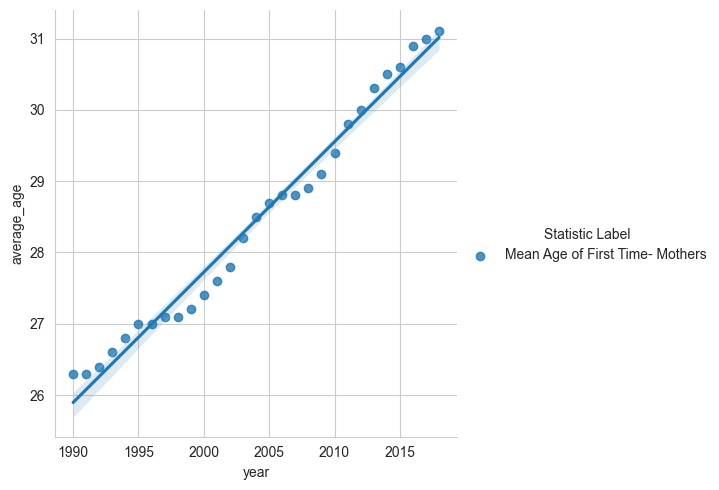

In [10]:
sns.set_style('whitegrid') 
sns.lmplot(x ='year', y ='average_age', data = df_aofm,hue ='Statistic Label') #,hue ='Broad Nationality Group'

Text(0.5, 1.0, 'Age of firstime mothers')

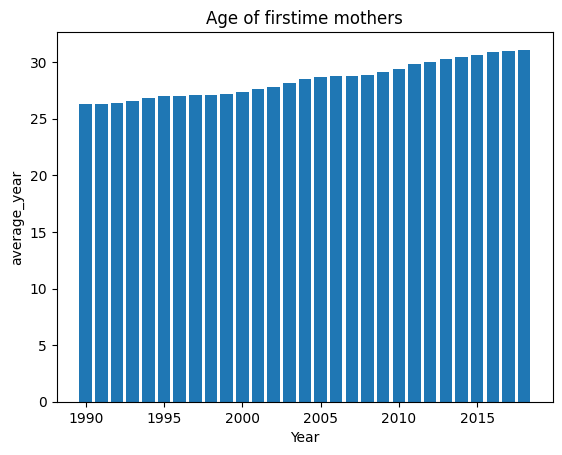

In [19]:
#variables to fill the bar
year_bar = df_aofm['year'].to_numpy()
average_year_bar = df_aofm['average_age'].to_numpy()

plt.bar(year_bar,average_year_bar)
plt.xlabel ('Year')
plt.ylabel("average_year")
plt.title("Age of firstime mothers")

In [39]:
def draw_boxplot(column,x_label,y_label):
    fig = plt.figure(1, figsize=(9, 6))
    ax = fig.add_subplot(111)

    ax.boxplot(column, vert=False, manage_ticks=True,boxprops=dict(color='red'))
    ax.set_xlabel(x_label)
    ax.set_yticks([1])
    ax.set_yticklabels([y_label])

    quantiles = np.quantile(column, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
    ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
              color='b', ls=':', lw=0.5, zorder=0)
    ax.set_ylim(0.5, 1.5)
    ax.set_xticks(quantiles)
    plt.show()

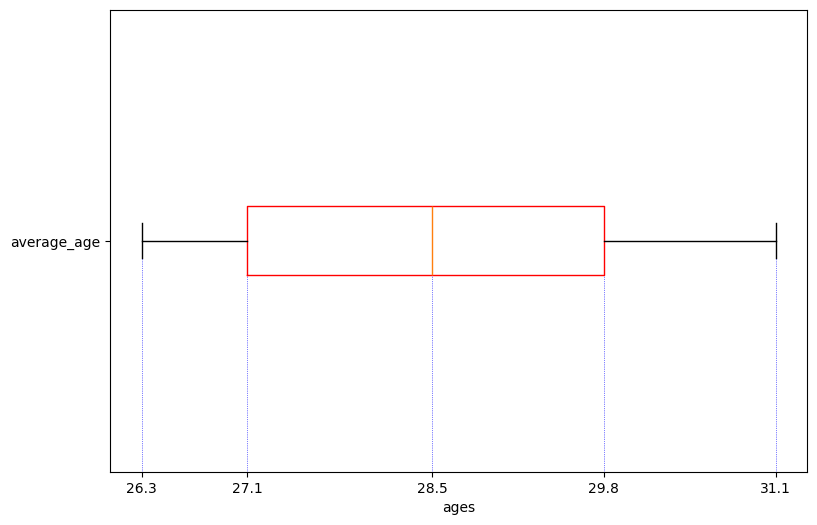

In [40]:
draw_boxplot(df_aofm['average_age'],'ages','average_age')

In [44]:
def draw_histogram(column,color_bar,color_border,):
    sns.distplot(column, hist=True, kde=True, 
             bins=int(180/5), color = color_bar, 
             hist_kws={'edgecolor':color_border},
             kde_kws={'linewidth': 4});

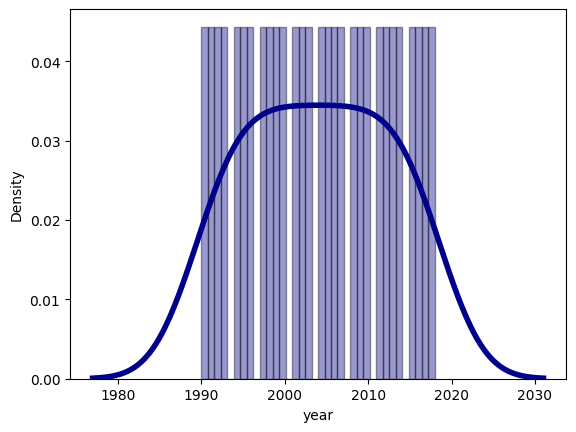

In [45]:
draw_histogram(df_aofm['year'],'darkblue','black')

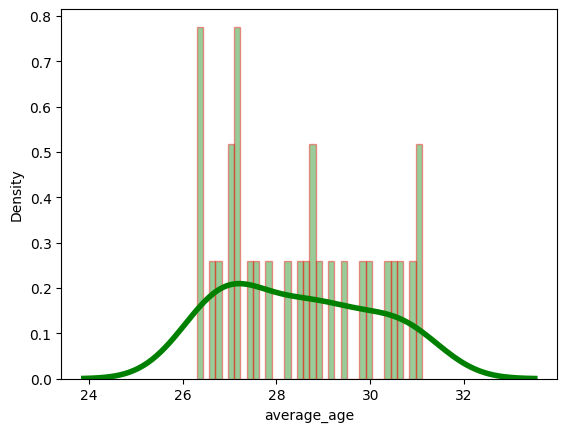

In [48]:
draw_histogram(df_aofm['average_age'],'green','red')

In [53]:
print('variance of year',np.var(df_aofm['year']))
print('variance of average_year',np.var(df_aofm['average_age']))

variance of year 70.0
variance of average_year 2.3845422116527946


# Statistics

## Use two discrete distributions (Binomial and/or Poisson)

## Normal distribution to explain or identify

## 5.       Explain the importance of the distributions used in point 3 and 4 in your analysis. Justify the choice of the variables and explain if the variables used for the discrete distributions could be used as normal distribution in this case. [0-15]



## Visualize data using heatmap

<Axes: >

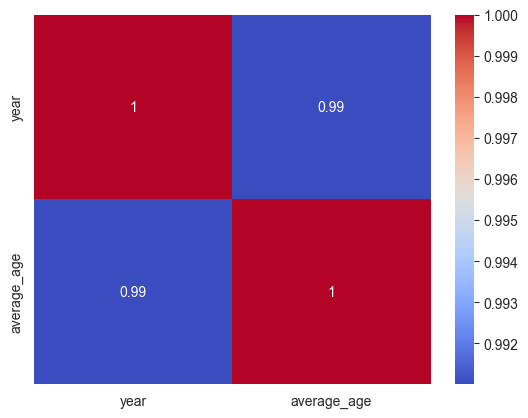

In [11]:
cols = ["year",'average_age']
coef_heat = np.corrcoef(df_aofm[cols].values.T)
sns.heatmap(coef_heat,cmap="coolwarm",yticklabels=cols,xticklabels=cols,annot=True,cbar=True)

## Splitting the dataset into the Training set and Test set

In [12]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare a variable named as 'X' and 'y'
X = df_aofm.iloc[:, 1].values # independent variable
y = df_aofm['average_age'].values # Target variable

X = X.reshape(-1,1) # reshape to an 2D array
y = y.reshape(-1, 1) # reshape to an 2D array

# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29, 1), (29, 1), (17, 1), (12, 1), (17, 1), (12, 1))

## using linear regression model

In [13]:
# Initialise an object slr by calling a method named as 'LinearRegression()'
from sklearn.linear_model import LinearRegression
lr = LinearRegression()#new linear regression class

# Train the model
lr.fit(X_train, y_train)

# Predict the results for the training and testing
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

## checking accuracy

In [14]:
from sklearn.metrics import r2_score

r2_score(y_train,y_pred_train)# checking accuracy in training data

0.980392433780072

In [15]:
r2_score(y_test,y_pred_test)# checking accuracy in test data

0.9846081538162629

# Visualize difference after applying model

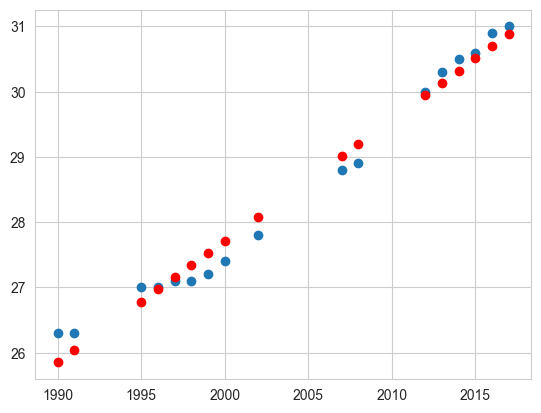

In [16]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train,color='red')

## Apply Suppor vector machine in regression

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

st_train_x = sc.fit_transform(X_train)
st_test_x = sc.transform(X_test)

In [31]:
from sklearn.svm import SVR
from sklearn import metrics

# Initialize model
svr_model = SVR(kernel='rbf',shrinking=False,C = 2, gamma = 0.2,epsilon=0.2)

# Train the model by calling a method fit()
svr_model.fit(st_train_x,y_train)

Y_pred_train = svr_model.predict(st_train_x)

print('Accuracy in SVR train is: ',metrics.r2_score(y_train, Y_pred_train))

Accuracy in SVR train is:  0.9905100901535177


In [32]:
svr_model_test = SVR(kernel = 'rbf')

# Initialize model for testing
svr_model_test.fit(st_train_x,y_train)

# Train the model by calling a method fit()
svr_model.fit(st_test_x,y_test)

Y_pred_test = svr_model.predict(st_test_x)

print('Accuracy in SVR test is: ',metrics.r2_score(y_test, Y_pred_test))

Accuracy in SVR test is:  0.9571790817718


In [35]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C':[1.5, 2,3],'gamma': [0.1,0.2,0.3,0.4],'epsilon':[0.1,0.2,0.3,0.4]}
model_svr = SVR()
gs_cv = GridSearchCV(model_svr, parameters,cv=5,refit='r2',verbose=4)
gs_cv.fit(X_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.970 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.946 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.968 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.995 total time=   0.0s
[CV 1/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=rbf;, score=0.990 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=rbf;, score=0.928 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=rbf;, score=0.954 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=rbf;, score=0.994 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=rbf;, score=0.897 total time=   0.0s
[CV 1/5] END C=1.5, epsilon=0.1, gamma=0.2,

[CV 1/5] END C=3, epsilon=0.4, gamma=0.4, kernel=rbf;, score=0.812 total time=   0.0s
[CV 2/5] END C=3, epsilon=0.4, gamma=0.4, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/5] END C=3, epsilon=0.4, gamma=0.4, kernel=rbf;, score=0.859 total time=   0.0s
[CV 4/5] END C=3, epsilon=0.4, gamma=0.4, kernel=rbf;, score=0.816 total time=   0.0s
[CV 5/5] END C=3, epsilon=0.4, gamma=0.4, kernel=rbf;, score=0.771 total time=   0.0s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1.5, 2, 3], 'epsilon': [0.1, 0.2, 0.3, 0.4],
                         'gamma': [0.1, 0.2, 0.3, 0.4],
                         'kernel': ('linear', 'rbf')},
             refit='r2', verbose=4)

In [37]:
print("Best params founded are : ", gs_cv.best_params_)
print("Best_estimators founded are : ",gs_cv.best_estimator_)
print("Best score founded is: ",gs_cv.best_score_)

Best params founded are :  {'C': 3, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best_estimators founded are :  SVR(C=3, gamma=0.1)
Best score founded is:  0.9850458113645191


In [21]:
df_fnie = pd.read_csv("FNA08_foreign_nationals_in_employment.csv")# fnie = foreign nationals in employment

In [22]:
df_fnie.head()

,Statistic Label,Broad Nationality Group,Sex,Industry Sector NACE Rev 2,Year,UNIT,VALUE
0,Foreign Nationals in Employment,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",2005,Number,5116.0
1,Foreign Nationals in Employment,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",2006,Number,6032.0
2,Foreign Nationals in Employment,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",2007,Number,6705.0
3,Foreign Nationals in Employment,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",2008,Number,6863.0
4,Foreign Nationals in Employment,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",2009,Number,6154.0


In [23]:
print("CHECKING the shape: ",df_fnie.shape)#Checking shape
print("\n CHECKING NULL values :\n",df_fnie.dtypes)#checking data types
#print("\n Check info:\n",df_fnie.info)# checking info
print("\n COUNT is :\n",df_fnie.count() )#count rows
print("\n CHECKING NULL values :\n",df_fnie.isnull().sum())#checking null values

CHECKING the shape:  (6762, 7)

 CHECKING NULL values :
 Statistic Label                object
Broad Nationality Group        object
Sex                            object
Industry Sector NACE Rev 2     object
Year                            int64
UNIT                           object
VALUE                         float64
dtype: object

 COUNT is :
 Statistic Label               6762
Broad Nationality Group       6762
Sex                           6762
Industry Sector NACE Rev 2    6762
Year                          6762
UNIT                          6762
VALUE                         6401
dtype: int64

 CHECKING NULL values :
 Statistic Label                 0
Broad Nationality Group         0
Sex                             0
Industry Sector NACE Rev 2      0
Year                            0
UNIT                            0
VALUE                         361
dtype: int64


In [24]:
df_fnie.describe()

,Year,VALUE
count,6762.000000,6401.000000
mean,2011.500000,6318.935166
std,4.031427,24869.071740
min,2005.000000,3.000000
25%,2008.000000,122.000000
50%,2011.500000,766.000000
75%,2015.000000,3064.000000
max,2018.000000,491639.000000


from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

## OVERFITTING or Underfitting ==> get the variance to show overfitting if is HIGH !! 
## UNERFITTING when there's a HIGH Bias